In [148]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [130]:
dados = pd.read_csv("dados_pre_processados.csv")
dados.drop("Unnamed: 0", axis=1, inplace=True)
dados.head()

,CodigoReceita,RelacaoAguaCimento Emitida,TipoLancamento,QuantidadeAgua,ConsumoTotal,Idade,TipoTraco,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
0,11051,1.011,C,930,2124.0,28,N,3051.0,15.0,0.9,10.50,18.37,23.266913,18.868387,0.027130
1,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,11.69,19.55,23.266913,20.723169,0.060009
2,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,10.16,16.73,23.266913,18.332992,0.095815
3,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,13.52,17.19,23.266913,23.522874,0.368405
4,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,7.71,13.52,23.266913,14.392958,0.064568


In [131]:
dados_por_aglomerante = dados.groupby("CodigoAglomerante")

In [132]:
dados_3051 = dados_por_aglomerante.get_group(3051.0)

In [133]:
fig = px.box(dados_3051, x="TipoLancamento", y="Rompimento28Dias", title='Influência do Tipo de Lançamento no Resultado')
fig.show()

In [134]:
fig = px.box(dados_3051, x="TipoTraco", y="Rompimento28Dias", title='Influência do Tipo de Traço no Resultado')
fig.show()

In [135]:
fig = px.scatter(dados_3051, x="Rompimento7Dias", y="Rompimento28Dias")
fig.show()

In [50]:
#fig = px.box(dados_3051, x="CodigoReceita", y="Rompimento28Dias", title='Influência do Tipo de Traço no Resultado')
#fig.show()
#PEGAR TIPO DE CIMENTO

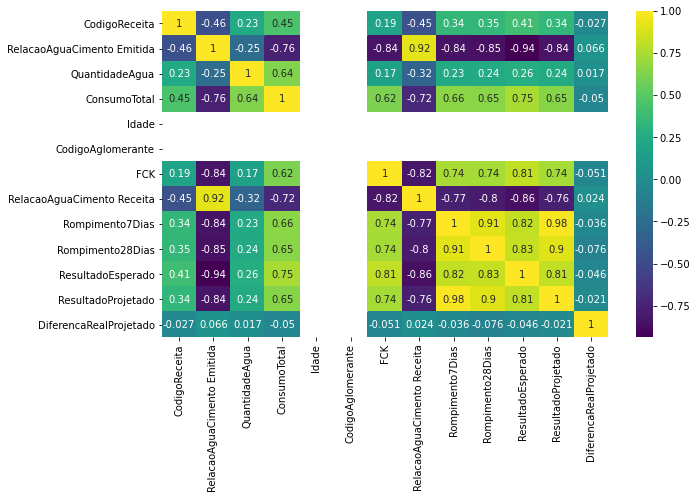

In [136]:
features_numericas = dados_3051.select_dtypes(include=['int', 'float'])

k = features_numericas.shape[1] #number of variables for heatmap
cols = dados_3051.corr().index
cm = dados_3051[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [137]:
dados_3051.head()

,CodigoReceita,RelacaoAguaCimento Emitida,TipoLancamento,QuantidadeAgua,ConsumoTotal,Idade,TipoTraco,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
0,11051,1.011,C,930,2124.0,28,N,3051.0,15.0,0.9,10.50,18.37,23.266913,18.868387,0.027130
1,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,11.69,19.55,23.266913,20.723169,0.060009
2,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,10.16,16.73,23.266913,18.332992,0.095815
3,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,13.52,17.19,23.266913,23.522874,0.368405
4,11051,1.011,C,1240,2832.0,28,N,3051.0,15.0,0.9,7.71,13.52,23.266913,14.392958,0.064568


In [138]:
dados_3051["TipoLancamento"] = LabelEncoder().fit_transform(dados_3051['TipoLancamento'])
dados_3051["TipoTraco"] = LabelEncoder().fit_transform(dados_3051['TipoTraco'])
dados_3051["CodigoReceita"] = LabelEncoder().fit_transform(dados_3051['CodigoReceita'])

<ipython-input-138-7e0e841b47f0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-138-7e0e841b47f0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-138-7e0e841b47f0>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
X = dados_3051.drop(["Rompimento28Dias", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1)
Y = dados_3051["Rompimento28Dias"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 3)

In [140]:
indices_x_test = x_test.index

In [141]:
modelo = sm.OLS(y_train, x_train)
result = modelo.fit()

print(result.summary(yname='Rompimento28Dias', xname=['CodigoReceita', 'RelacaoAguaCimento Emitida', 'TipoLancamento',
       'QuantidadeAgua', 'ConsumoTotal', 'Idade', 'TipoTraco',
       'CodigoAglomerante', 'FCK', 'RelacaoAguaCimento Receita',
       'Rompimento7Dias']))

                            OLS Regression Results                            
Dep. Variable:       Rompimento28Dias   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     3491.
Date:                Sat, 26 Sep 2020   Prob (F-statistic):               0.00
Time:                        19:36:38   Log-Likelihood:                -12878.
No. Observations:                5154   AIC:                         2.578e+04
Df Residuals:                    5144   BIC:                         2.584e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
CodigoReceita       

In [170]:
mask_dados_teste = dados_3051.index.isin(indices_x_test)

dados_teste = dados_3051[mask_dados_teste]
dados_teste.head()

,CodigoReceita,RelacaoAguaCimento Emitida,TipoLancamento,QuantidadeAgua,ConsumoTotal,Idade,TipoTraco,CodigoAglomerante,FCK,RelacaoAguaCimento Receita,Rompimento7Dias,Rompimento28Dias,ResultadoEsperado,ResultadoProjetado,DiferencaRealProjetado
0,0,1.011,1,930,2124.0,28,1,3051.0,15.0,0.9,10.50,18.37,23.266913,18.868387,0.027130
8,0,1.011,1,930,2124.0,28,1,3051.0,15.0,0.9,11.08,20.58,23.266913,19.594071,0.047907
9,0,1.011,1,775,1770.0,28,1,3051.0,15.0,0.9,12.30,23.18,23.266913,21.361210,0.078464
10,0,1.011,1,1120,2832.0,28,1,3051.0,15.0,0.9,10.20,18.25,23.266913,18.294298,0.002427
15,0,1.011,1,1190,3010.0,28,1,3051.0,15.0,0.9,8.97,16.80,23.266913,16.438400,0.021524


In [171]:
comparativos = pd.DataFrame()

comparativos["Rompimento28Dias"] = dados_teste["Rompimento28Dias"]
comparativos["ResultadoProjetado"] = dados_teste["ResultadoProjetado"]

comparativos.head()

,Rompimento28Dias,ResultadoProjetado
0,18.37,18.868387
8,20.58,19.594071
9,23.18,21.361210
10,18.25,18.294298
15,16.80,16.438400


In [172]:
comparativos["ProjetadoPeloModeloRegLin"] = result.predict(dados_teste.drop(["Rompimento28Dias", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1))

In [173]:
comparativos.head()

,Rompimento28Dias,ResultadoProjetado,ProjetadoPeloModeloRegLin
0,18.37,18.868387,18.729860
8,20.58,19.594071,19.199253
9,23.18,21.361210,20.205975
10,18.25,18.294298,18.382323
15,16.80,16.438400,17.372777


In [177]:
def EncontraProjecaoMaisProxima(row):
    erro_projetado_curva = np.abs(row["Rompimento28Dias"] - row["ResultadoProjetado"])
    erro_projetado_modelo = np.abs(row["Rompimento28Dias"] - row["ProjetadoPeloModeloRegLin"])
    
    if (erro_projetado_curva <= erro_projetado_modelo):
        return 'Curva'
    else:
        return 'Modelo'

In [178]:
comparativos["ProjecaoMaisAproximada"] = comparativos.apply(EncontraProjecaoMaisProxima, axis = "columns")

In [179]:
comparativos["ProjecaoMaisAproximada"].value_counts()

Modelo    1291
Curva      919
Name: ProjecaoMaisAproximada, dtype: int64

Modelo: 1291 |
Curva: 919

In [180]:
svmModel = svm.SVR(kernel='poly')
svmModel.fit(x_train, y_train)

SVR(kernel='poly')

In [181]:
svmModel.predict(x_test)

array([29.86542043, 32.35731517, 23.71914701, ..., 44.98213004,
       34.65914257, 28.47573414])

In [182]:
comparativos["ProjetadoPeloModeloSVM"] = svmModel.predict(dados_teste.drop(["Rompimento28Dias", "ResultadoEsperado", "ResultadoProjetado", "DiferencaRealProjetado"], axis=1))

In [183]:
def EncontraProjecaoMaisProxima(row):
    erro_projetado_curva = np.abs(row["Rompimento28Dias"] - row["ResultadoProjetado"])
    erro_projetado_modelo = np.abs(row["Rompimento28Dias"] - row["ProjetadoPeloModeloSVM"])
    
    if (erro_projetado_curva <= erro_projetado_modelo):
        return 'Curva'
    else:
        return 'Modelo'

In [184]:
comparativos["ProjecaoMaisAproximadaSVM"] = comparativos.apply(EncontraProjecaoMaisProxima, axis = "columns")

In [185]:
comparativos["ProjecaoMaisAproximadaSVM"].value_counts()

Curva     1459
Modelo     751
Name: ProjecaoMaisAproximadaSVM, dtype: int64